In [29]:
from pandas_ml import ConfusionMatrix

In [30]:
import numpy as np
import pandas as pd
import pydotplus
#from google.colab import drive
from IPython.display import Image
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from io import StringIO
import warnings
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy import misc
from sklearn import tree
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_validate, KFold

# To support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import math

# To display all the plots inline
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [31]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 6
warnings.filterwarnings("ignore")

In [32]:
bank_data = pd.read_csv('./bank-additional-full.csv')

In [33]:
#Total rows and columns in dataset
bank_data.shape

(41188, 21)

In [34]:
#Checking missing/null values
bank_data.isnull().values.any()

False

In [35]:
bank_data["job"] = bank_data["job"].astype('category')
bank_data["marital"] = bank_data["marital"].astype('category')
bank_data["education"] = bank_data["education"].astype('category')
bank_data["default"] = bank_data["default"].astype('category')
bank_data["housing"] = bank_data["housing"].astype('category')
bank_data["loan"] = bank_data["loan"].astype('category')
bank_data["contact"] = bank_data["contact"].astype('category')
bank_data["month"] = bank_data["month"].astype('category')
bank_data["day_of_week"] = bank_data["day_of_week"].astype('category')
bank_data["poutcome"] = bank_data["poutcome"].astype('category')
bank_data["y"] = bank_data["y"].astype('category')

In [36]:
bank_data["job"] = bank_data["job"].cat.codes
bank_data["marital"] = bank_data["marital"].cat.codes
bank_data["education"] = bank_data["education"].cat.codes
bank_data["default"] = bank_data["default"].cat.codes
bank_data["housing"] = bank_data["housing"].cat.codes
bank_data["loan"] = bank_data["loan"].cat.codes
bank_data["contact"] = bank_data["contact"].cat.codes
bank_data["month"] = bank_data["month"].cat.codes
bank_data["day_of_week"] = bank_data["day_of_week"].cat.codes
bank_data["poutcome"] = bank_data["poutcome"].cat.codes
bank_data["y"] = bank_data["y"].cat.codes

bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [37]:
Y = bank_data["y"]

In [38]:
X = bank_data.drop(["y"], axis=1)

In [39]:
X = X.values

In [40]:
X.shape

(41188, 20)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [42]:
C = DecisionTreeClassifier(min_samples_split = 200, max_depth = 3)
dt = C.fit(X_train, Y_train)


In [43]:
features = bank_data.columns[0:len(bank_data.columns)-1]
features

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [44]:
def show_tree(tr, features, path):
    f = StringIO()
    tree.export_graphviz(tr, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

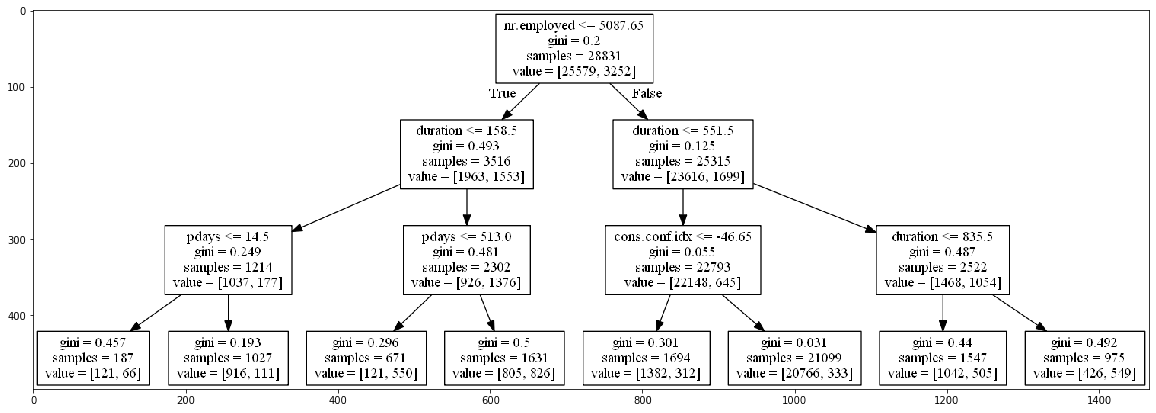

In [45]:
show_tree(dt, features, 'dec_tree_01.png')

In [46]:
y_pred = C.predict(X_test)

In [47]:
y_predd = C.predict(X_train)

In [48]:
accuracy_score(y_pred, Y_test)

0.9103342235170349

In [49]:
accuracy_score(y_predd, Y_train)

0.9070791855988346

In [50]:
# Here we use closure to store the related variables
max_depths = list(range(1, 20))
s=80
a_i = []
def create_plot_y(_X, _y):
    X_train, Y_train = _X, _y
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    def plot_y(max_depth=1,min_samples_split=2, expand=3.1):
        yhat = np.zeros(Y_train.shape[0],)
        
        # Cross-validation
        for train, valid in kfold.split(X_train, Y_train):
            model = DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,
                                          random_state=123)
            model.fit(X_train[train], Y_train[train])
            yhat[valid] = model.predict(X_train[valid])
            #a = metrics.accuracy_score(y_train[valid], yhat[valid]) 
            #a_i.append(a)
        plt.title('Predicted vs actual, max depth: %s, minimal samples for split:%s' % (str(max_depth), str(min_samples_split)))
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.scatter(Y_train, yhat)
        plt.show()
    return plot_y

In [51]:
max_depth_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=200,
    step=1,
    continuous_update=False,
    description='Max depth:')
min_samples_split_widget = widgets.IntSlider(
    value=2,
    min=2,
    max=20,
    step=1,
    continuous_update=False,
    description='Min Split:')
expand_widget = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=1,
    step=0.1,
    continuous_update=False,
    description='Expand:')
interact(create_plot_y(X_train, Y_train), 
         max_depth=max_depth_widget, 
         min_samples_split=min_samples_split_widget,
         expand=expand_widget)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Max depth:', max=200, min=1), I…

<function __main__.create_plot_y.<locals>.plot_y(max_depth=1, min_samples_split=2, expand=3.1)>

In [52]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123) 
# definig yhat array with the no.of rows equal to x_train and 1 column 
yhat = np.zeros((X_train.shape[0], ))

In [53]:
# K-fold Cross-validation 
# a_i = [] 
# K = []
# m = 13 
# n = 5 
# b_i = [[0 for i in range(n)] for j in range(m)] 
# i = 0 
# j= 0
#for k in range(1,20,2): 
for train, valid in kfold.split(X_train, Y_train): 
    model = DecisionTreeClassifier(min_samples_split = 200, max_depth = 5) 
    model.fit(X_train[train], Y_train[train]) 
    yhat[valid] = model.predict(X_train[valid]) 
    a = metrics.accuracy_score(Y_train[valid], yhat[valid]) 
#     a_i.append(a)
#     K.append(k)
#     b_i[i][j]=a 
#     j = j+1
# j=0 
# i=i+1

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from pprint import pprint

features = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

#df = pd.read_csv('magic04.data',header=None,names=features)
df['class'] = df['class'].map({'g':0,'h':1})

x = df[features[:-1]]
y = df['class']

# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)